**Date Started** = 1 April 2019

**Date Completed** = *(to be continued after column-wise feature selection)*

## Objectives of this notebooks
1. Check how we can differentiate whether car is recharged in between the trips.
2. Check pearson correlation (cross-correlation) b/w the various trips of a vehicle.
3. Check auto-correlation within the trips.

## Conclusions Drawn

In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
from random_csv_selector import csv
from preprocess import data_preprocessor
from scipy.signal import correlate
from scipy.spatial.distance import euclidean
from statsmodels.tsa.stattools import adfuller

In [3]:
plt.rcParams["figure.figsize"] = (10, 10)
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 100)
sns.set_style("darkgrid")
os.chdir("/home/CWSHPMU2316/Desktop/EVRangePrediction/data/raw")

In [4]:
data = pd.read_csv("358272088699072_2019-01-23_cb.csv")

In [5]:
len(data)

337200

In [6]:
data = data_preprocessor(data)

In [7]:
data.head()

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
0,DEFREG:358272088699072,1,NaN,77.07334,28.497028,1.0,0,1548204863420,77.07334,28.497028,357.59113,1104361856,5,30.0,2.5,5,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,1087,0.0,0,10,0,0,1,0.0,0,13.9,0,58.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,13.8,0.15,0.15,4.07,4.07,93.5,93.5,93.1,93.1,100,20.5,20.5,20.5,17.5,17.5,17.5,0.0,12.5,9.5,267.25,254.25,254.25,1800.0,1880,99.9,99.9,16,204,154,16,189,202,16,204,152,16,196,212,0.0,-0.1,0,-0.2,-0.2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,17,16,0,1,12.4,0,-0.1875,10.075,0.0,0,-65532,0,9840,11.0,1,11.7,4.0,65,6,1,2440,2600,2360,138,0,-951.0,-269.0,-312.0,NaN
1,DEFREG:358272088699072,1,NaN,77.07334,28.497028,1.0,100,1548204863520,77.07334,28.497028,357.59113,1104361856,5,30.0,2.5,5,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,1087,0.0,0,10,0,0,1,0.0,0,13.9,0,58.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,13.8,0.15,0.15,4.07,4.07,93.5,93.5,93.1,93.1,100,20.5,20.5,20.5,17.5,17.5,17.5,0.0,12.5,9.5,267.25,254.25,254.25,1800.0,1880,99.9,99.9,16,204,154,16,189,202,16,204,152,16,196,212,0.0,-0.1,0,-0.2,-0.2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,17,16,0,1,12.4,0,-0.1875,10.075,0.0,0,-65532,0,9840,11.0,1,11.7,4.0,65,6,1,2440,2600,2360,138,0,-951.0,-269.0,-312.0,NaN
2,DEFREG:358272088699072,1,NaN,77.07334,28.497028,1.0,200,1548204863620,77.07334,28.497028,357.59113,1104361856,5,30.0,2.5,5,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,1087,0.0,0,10,0,0,1,0.0,0,13.9,0,58.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,13.8,0.15,0.15,4.07,4.07,93.5,93.5,93.1,93.1,100,20.5,20.5,20.5,17.5,17.5,17.5,0.0,12.5,9.5,267.25,254.25,254.25,1800.0,1880,99.9,99.9,16,204,154,16,189,202,16,204,152,16,196,212,0.0,-0.1,0,-0.2,-0.2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,17,16,0,1,12.4,0,-0.1875,10.075,0.0,0,-65532,0,9840,11.0,1,11.7,4.0,65,6,1,2440,2600,2360,138,0,-951.0,-269.0,-312.0,NaN
3,DEFREG:358272088699072,1,NaN,77.07334,28.497028,1.0,300,1548204863720,77.07334,28.497028,357.59113,1104361856,5,30.0,2.5,5,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,1087,0.0,0,10,0,0,1,0.0,0,13.9,0,58.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,13.8,0.15,0.15,4.07,4.07,93.5,93.5,93.1,93.1,100,20.5,20.5,20.5,17.5,17.5,17.5,0.0,12.5,9.5,267.25,254.25,254.25,1800.0,1880,99.9,99.9,16,204,154,16,189,202,16,204,152,16,196,212,

In [8]:
data.tail()

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
337195,DEFREG:358272088699072,19,NaN,77.07352,28.49699,265.79,239500,1548261978295,77.073615,28.496989,180.65732,714359872,5,30.0,0.9,12,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,1116,0.0,3,10,0,0,1,0.0,0,13.9,0,60.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,12.1,0.0,0.0,3.705,3.705,50.1,50.1,49.6,49.6,100,34.0,35.0,34.0,31.5,31.5,31.5,0.0,0.0,0.0,245.0,245.0,245.0,40000.0,40000,100.0,100.0,21,36,0,24,35,0,21,22,0,26,80,26,0.0,0.1,0,0.2,0.2,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,25,20,0,1,12.2,0,-0.0625,0.375,0.0,0,-65532,0,10035,17.0,0,19.7,4.0,65,6,1,0,0,0,121,-69,-992.0,-170.0,-281.0,NaN
337196,DEFREG:358272088699072,19,NaN,77.07352,28.49699,265.79,239600,1548261978395,77.073615,28.496989,180.65732,714359872,5,30.0,0.9,12,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,1116,0.0,3,10,0,0,1,0.0,0,13.9,0,60.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,12.1,0.0,0.0,3.705,3.705,50.1,50.1,49.6,49.6,100,34.0,35.0,34.0,31.5,31.5,31.5,0.0,0.0,0.0,245.0,245.0,245.0,40000.0,40000,100.0,100.0,21,36,0,24,35,0,21,22,0,26,80,26,0.0,0.1,0,0.2,0.2,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,25,20,0,1,12.2,0,-0.0625,0.375,0.0,0,-65532,0,10035,17.0,0,19.7,4.0,65,6,1,0,0,0,121,-69,-992.0,-170.0,-281.0,NaN
337197,DEFREG:358272088699072,19,NaN,77.07352,28.49699,265.79,239700,1548261978495,77.073615,28.496989,180.65732,714359872,5,30.0,0.9,12,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,1116,0.0,3,10,0,0,1,0.0,0,13.9,0,60.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,12.1,0.0,0.0,3.705,3.705,50.1,50.1,49.6,49.6,100,34.0,35.0,34.0,31.5,31.5,31.5,0.0,0.0,0.0,245.0,245.0,245.0,40000.0,40000,100.0,100.0,21,36,0,24,35,0,21,22,0,26,80,26,0.0,0.1,0,0.2,0.2,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,25,20,0,1,12.2,0,-0.0625,0.375,0.0,0,-65532,0,10035,17.0,0,19.7,4.0,65,6,1,0,0,0,121,-69,-992.0,-170.0,-281.0,NaN
337198,DEFREG:358272088699072,19,NaN,77.07352,28.49699,265.79,239800,1548261978595,77.073615,28.496989,180.65732,714359872,5,30.0,0.9,12,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,1116,0.0,3,10,0,0,1,0.0,0,13.9,0,60.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,12.1,0.0,0.0,3.705,3.705,50.1,50.1,49.6,49.6,100,34.0,35.0,34.0,31.5,31.5,31.5,0.0,0.0,0.0,245.0,245.0,245.0,40000.0,40000,100.0,100.0,21,36,0,24,35,0,21,22,0,26,80,26,0.0,0.1,0,0.2,0.2,0,3,Na

In [9]:
data["tp"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

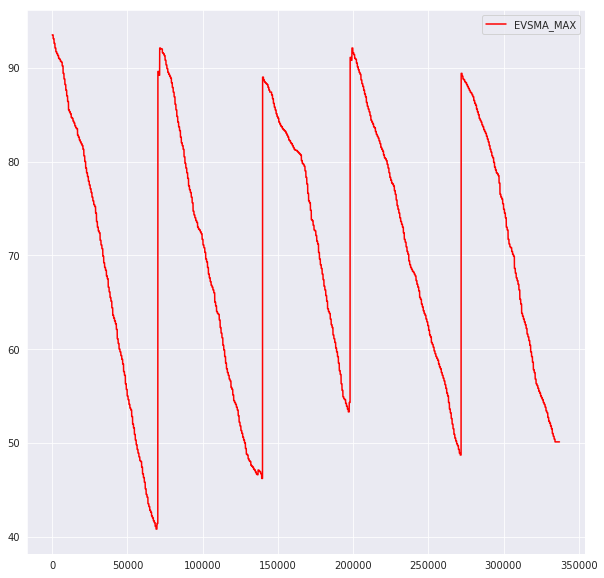

In [10]:
plt.plot(data["EVSMA_MAX"], label = "EVSMA_MAX", color = "red")
plt.legend()
#plt.plot(data["sp"]/100000)
plt.show()

In [11]:
data[data["sp"] == 0]["EVSMA_MAX"]

0         93.5
14400     84.1
46800     58.4
69600     41.4
70200     89.6
71400     92.1
136800    47.1
137400    47.0
139200    46.2
139800    89.0
141000    88.5
141600    88.4
144600    87.4
197400    54.3
198000    91.1
199200    92.1
271800    89.4
330000    52.3
334800    50.1
Name: EVSMA_MAX, dtype: float64

---

## EVVSP across trips
In this section, we are checking the how the EVVSP is related across the different trips. For this we will follow following procedure - 
1. We will select four largest trips across the dataset and plot them against each other.
2. We will calculate the Euclidean Distance b/w the two time series to check if 
3. Plot the rolling mean to get the gist of what is happening across the vehicles. The value of rolling mean window was taken as 4000, to increase the resolution and get a clearer picture.

In [12]:
#fig = plt.figure(figsize = (10, 10))
#for i in range(0, len(list(data["tp"].unique()))):
#    ax = fig.add_subplot(10, 2, i+1, xticks = [], yticks = [])
#    temp = data[data["tp"] == i+1]["EVVSP"]
#    temp_time = data[data["tp"] == i+1]["sp"]
#    plt.plot("EVVSP")
#    title = "EVVSP for trip " + str(i+1) 
#    plt.title(title)
#    sns.lineplot(x = temp_time, y = temp)
#    plt.show()

In [13]:
for i in range(0, len(list(data["tp"].unique()))):
    temp = data[data["tp"] == i+1]["EVVSP"]
    if len(temp) > 40000:
        print(i+1)

6
13
16
17


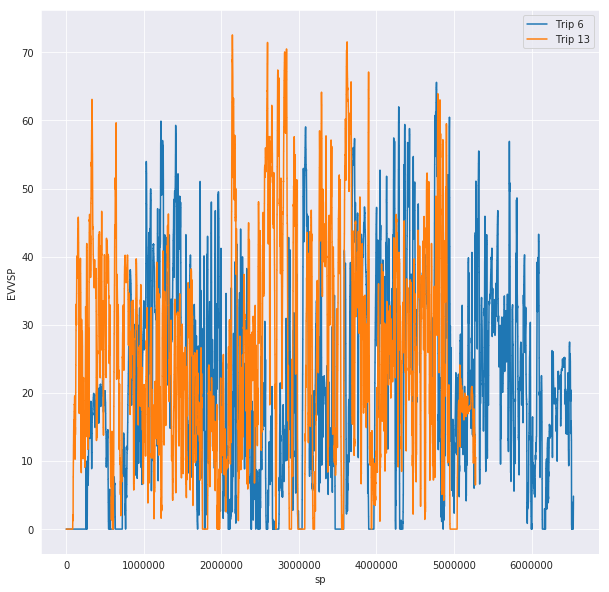

In [14]:
## EVVSP for trip6 and trip13
sns.lineplot(x = data[data["tp"] == 6]["sp"], y = data[data["tp"] == 6]["EVVSP"], data = data, label = "Trip 6")
sns.lineplot(x = data[data["tp"] == 13]["sp"], y = data[data["tp"] == 13]["EVVSP"], data = data, label = "Trip 13")
plt.show()

In [15]:
x = data[data["tp"] == 6]["EVVSP"][0:40000]
y = data[data["tp"] == 13]["EVVSP"][0:40000]
print("Euclidean Distance b/w two time series = {}".format(euclidean(x, y)))

Euclidean Distance b/w two time series = 4916.7295906304225


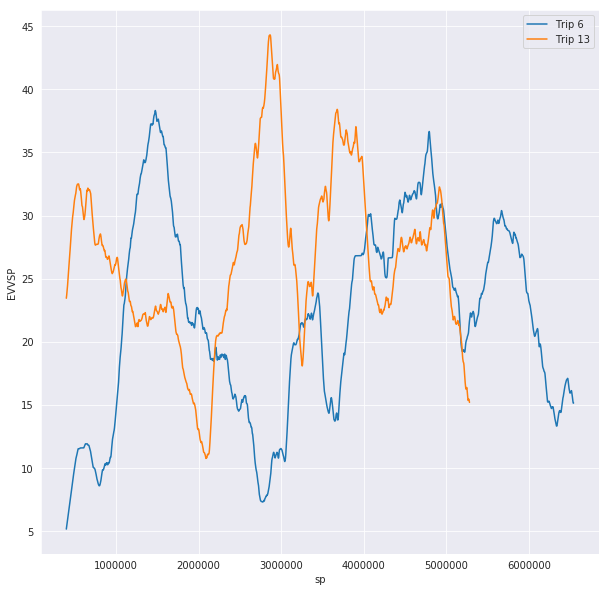

In [16]:
sns.lineplot(x = data[data["tp"] == 6]["sp"], y = data[data["tp"] == 6]["EVVSP"].rolling(4000).mean(), data = data, label = "Trip 6")
sns.lineplot(x = data[data["tp"] == 13]["sp"], y = data[data["tp"] == 13]["EVVSP"].rolling(4000).mean(), data = data, label = "Trip 13")
plt.show()

In [17]:
x = data[data["tp"] == 6]["EVVSP"][0:40000].rolling(4000).mean()
y = data[data["tp"] == 13]["EVVSP"][0:40000].rolling(4000).mean()
x = x[4000:]
y = y[4000:]
print("Euclidean Distance b/w two Rolling means' time series = {}".format(euclidean(x, y)))

Euclidean Distance b/w two Rolling means' time series = 2942.9419442101266


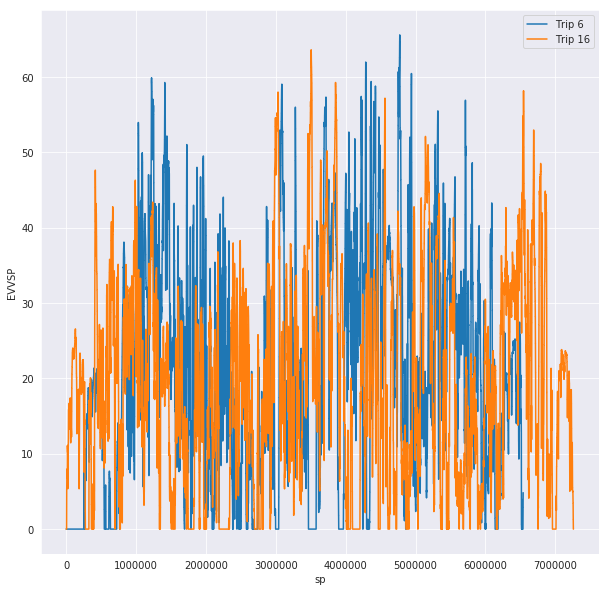

In [18]:
sns.lineplot(x = data[data["tp"] == 6]["sp"], y = data[data["tp"] == 6]["EVVSP"], data = data, label = "Trip 6")
sns.lineplot(x = data[data["tp"] == 16]["sp"], y = data[data["tp"] == 16]["EVVSP"], data = data, label = "Trip 16")
plt.show()

In [19]:
x = data[data["tp"] == 6]["EVVSP"][0:40000]
y = data[data["tp"] == 16]["EVVSP"][0:40000]
print("Euclidean Distance b/w two time series = {}".format(euclidean(x, y)))

Euclidean Distance b/w two time series = 3889.20963323528


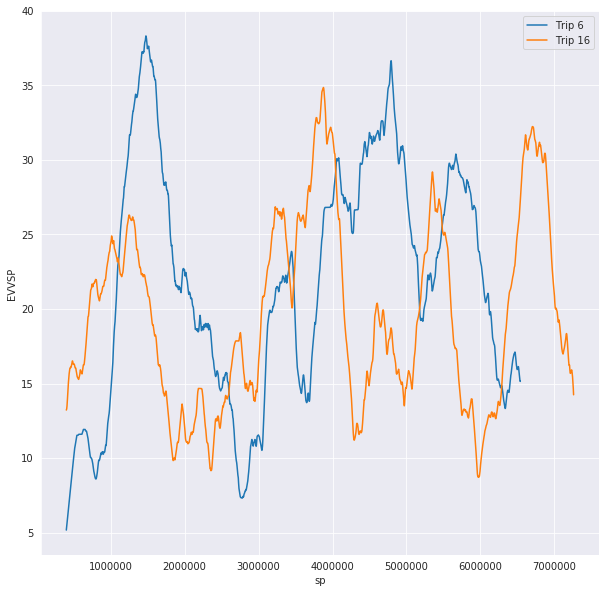

In [20]:
sns.lineplot(x = data[data["tp"] == 6]["sp"], y = data[data["tp"] == 6]["EVVSP"].rolling(4000).mean(), data = data, label = "Trip 6")
sns.lineplot(x = data[data["tp"] == 16]["sp"], y = data[data["tp"] == 16]["EVVSP"].rolling(4000).mean(), data = data, label = "Trip 16")
plt.show()

In [21]:
x = data[data["tp"] == 6]["EVVSP"][0:40000].rolling(4000).mean()
y = data[data["tp"] == 16]["EVVSP"][0:40000].rolling(4000).mean()
x = x[4000:]
y = y[4000:]
print("Euclidean Distance b/w two Rolling means' time series = {}".format(euclidean(x, y)))

Euclidean Distance b/w two Rolling means' time series = 1731.1086875341796


In [22]:
#sns.lineplot(x = data[data["tp"] == 6]["sp"], y = data[data["tp"] == 6]["EVVSP"].rolling(4000).std(), data = data, label = "Trip 6")
#sns.lineplot(x = data[data["tp"] == 16]["sp"], y = data[data["tp"] == 16]["EVVSP"].rolling(4000).std(), data = data, label = "Trip 16")
#plt.show()

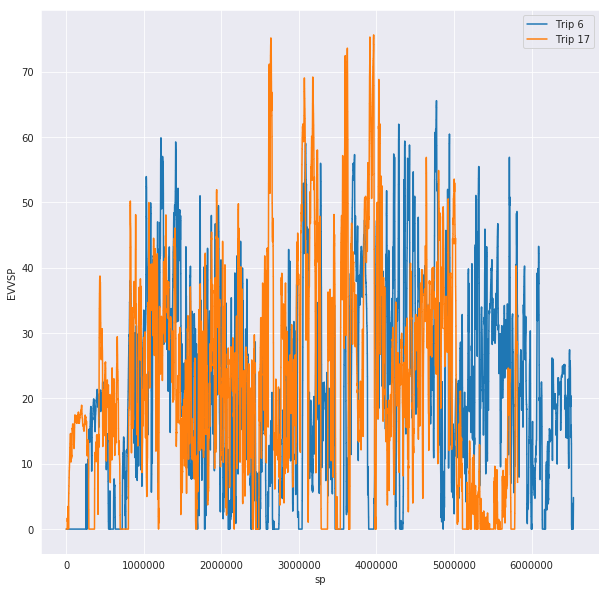

In [23]:
sns.lineplot(x = data[data["tp"] == 6]["sp"], y = data[data["tp"] == 6]["EVVSP"], data = data, label = "Trip 6")
sns.lineplot(x = data[data["tp"] == 17]["sp"], y = data[data["tp"] == 17]["EVVSP"], data = data, label = "Trip 17")
plt.show()

In [24]:
x = data[data["tp"] == 6]["EVVSP"][0:40000]
y = data[data["tp"] == 17]["EVVSP"][0:40000]
print("Euclidean Distance b/w two time series = {}".format(euclidean(x, y)))

Euclidean Distance b/w two time series = 4227.160553173312


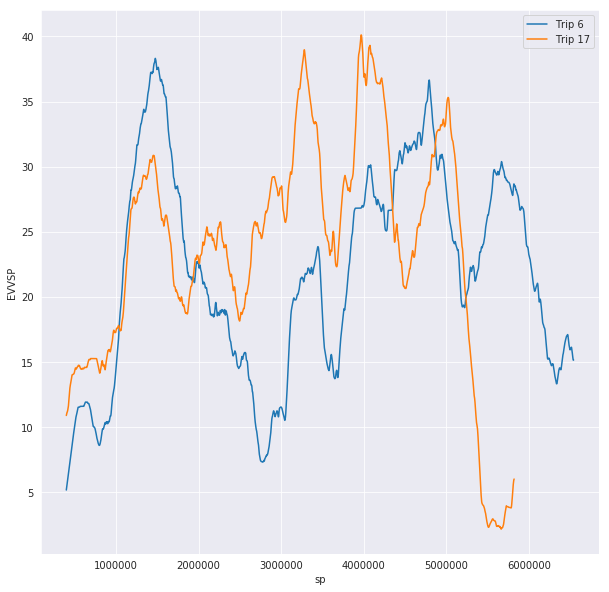

In [25]:
sns.lineplot(x = data[data["tp"] == 6]["sp"], y = data[data["tp"] == 6]["EVVSP"].rolling(4000).mean(), data = data, label = "Trip 6")
sns.lineplot(x = data[data["tp"] == 17]["sp"], y = data[data["tp"] == 17]["EVVSP"].rolling(4000).mean(), data = data, label = "Trip 17")
plt.show()

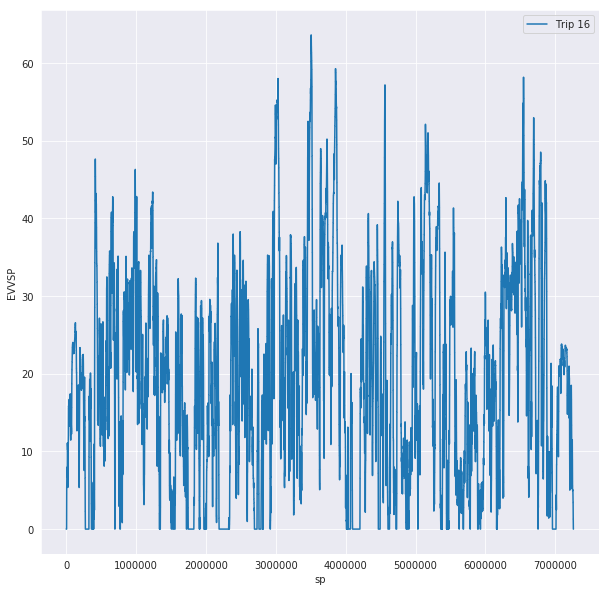

In [62]:
sns.lineplot(x = data[data["tp"] == 16]["sp"], y = data[data["tp"] == 16]["EVVSP"], data = data, label = "Trip 16")
#sns.lineplot(x = data[data["tp"] == 17]["sp"], y = data[data["tp"] == 17]["EVVSP"], data = data, label = "Trip 17")
plt.show()

In [27]:
x = data[data["tp"] == 16]["EVVSP"][0:40000]
y = data[data["tp"] == 17]["EVVSP"][0:40000]
print("Euclidean Distance b/w two time series = {}".format(euclidean(x, y)))

Euclidean Distance b/w two time series = 3939.502056647921


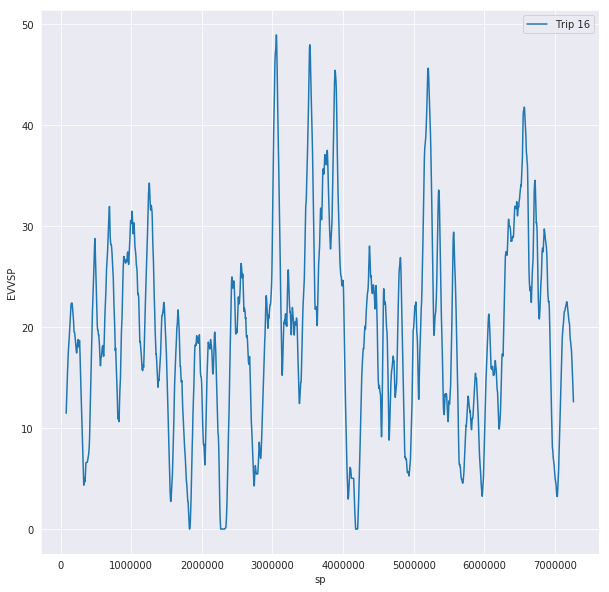

In [61]:
sns.lineplot(x = data[data["tp"] == 16]["sp"], y = data[data["tp"] == 16]["EVVSP"].rolling(800).mean(), data = data, label = "Trip 16")
#sns.lineplot(x = data[data["tp"] == 17]["sp"], y = data[data["tp"] == 17]["EVVSP"].rolling(4000).mean(), data = data, label = "Trip 17")
plt.show()

---

## Granger Test for Cointegration
This test is used for checking the hypothesis whether we can predict a time series based on other time series. This method will be far more robust than the Euclidean distance and will allow us to draw a conclusion whether a previous trip should be used to predict future trips.

In [30]:
# getting the data of two consecutive trips
trip_16 = data[data["tp"] == 16]["EVVSP"][0:40000]
trip_17 = data[data["tp"] == 17]["EVVSP"][0:40000]

In [34]:
# converting the data in numpy arrays
x = trip_16.values
y = trip_17.values

In [47]:
# running the Augmented Dickey - Fuller test
x_result = adfuller(x)
y_result = adfuller(y)

In [45]:
print(".....TRIP 16.....")
print("ADF = {:.3f}".format(x_result[0]))
print("p-value = {:.13f}".format(x_result[1]))
print("Critical values = ")
for key, value in x_result[4].items():
    print('\t%s: %.3f' % (key, value))

.....TRIP 16.....
ADF = -7.740
p-value = 0.0000000000107
Critical values = 
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [46]:
print(".....TRIP 17.....")
print("ADF = {:.3f}".format(y_result[0]))
print("p-value = {:.15f}".format(y_result[1]))
print("Critical values = ")
for key, value in y_result[4].items():
    print('\t%s: %.3f' % (key, value))

.....TRIP 17.....
ADF = -8.391
p-value = 0.000000000000237
Critical values = 
	1%: -3.431
	5%: -2.862
	10%: -2.567


The above results shows us that the data we have is stationary and time independent. This is tested by **Augmented-Dickey Fuller Test**. This conclusion is drawn by looking at the p-value above, whose threshold is `0.05`. 

In [48]:
from sklearn.linear_model import LinearRegression

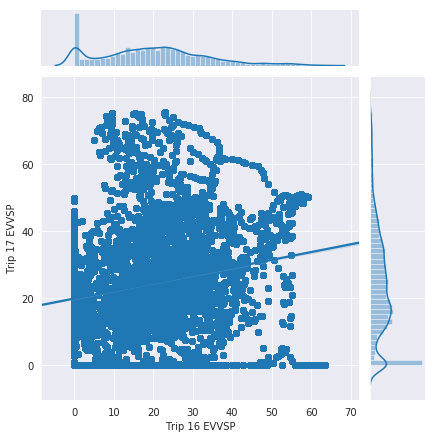

In [51]:
sns.jointplot(x = x, y = y, kind = "reg")
plt.xlabel("Trip 16 EVVSP")
plt.ylabel("Trip 17 EVVSP")
plt.show()

In [53]:
#regressor = LinearRegression()

In [ ]:
#x_train, y_train, x_test, y_test = 

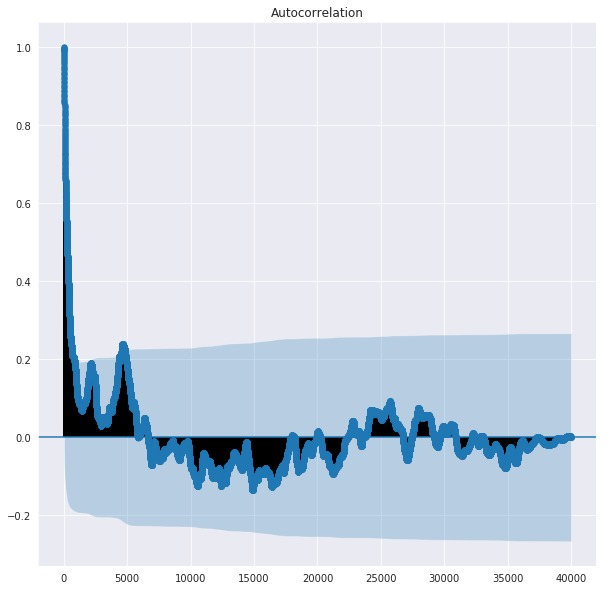

In [82]:
plot_acf(x);

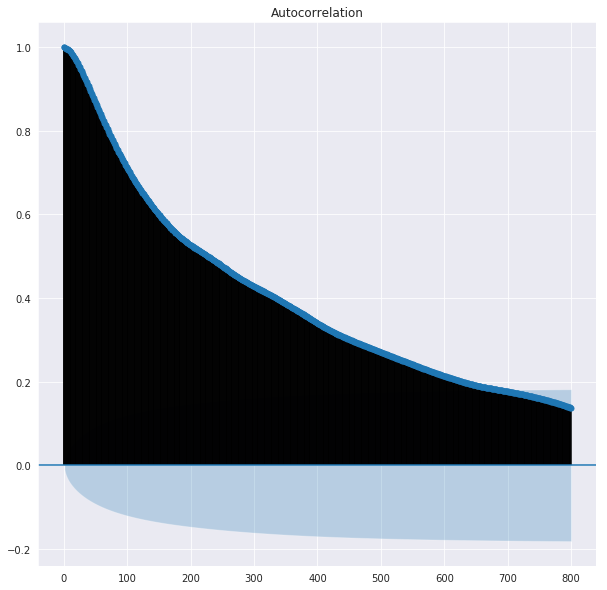

In [68]:
plot_acf(y, lags = 800);

In [63]:
x_current = data[data["tp"] == 16]["EVBOA_AVG"]

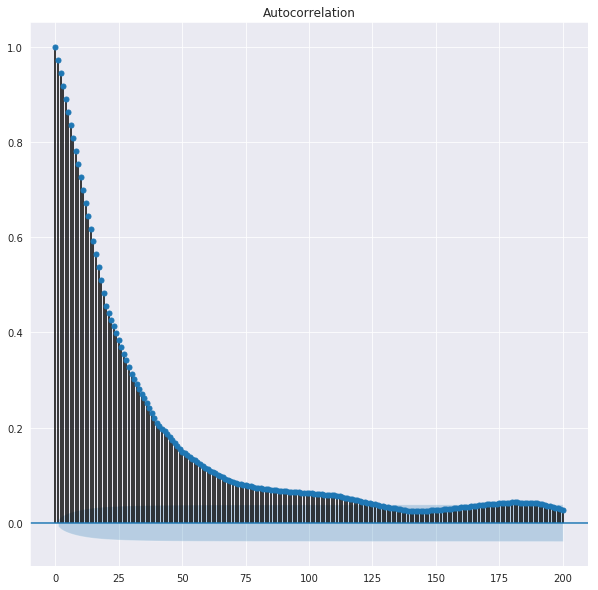

In [71]:
plot_acf(x_current, lags = 200);

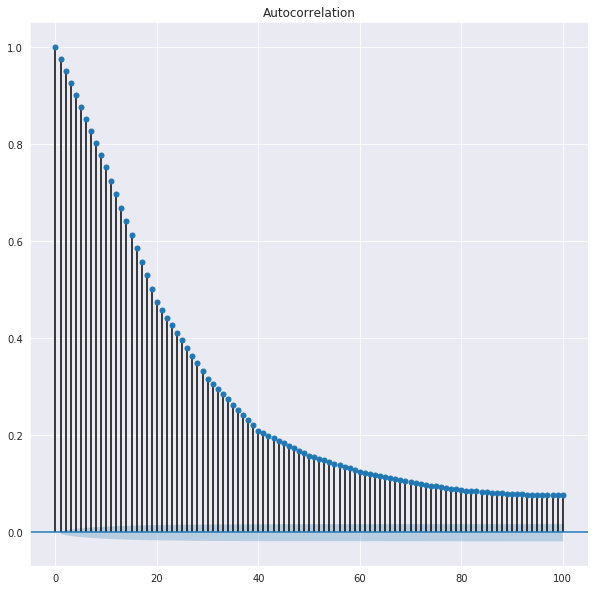

In [76]:
plot_acf(data["EVBOA_AVG"], lags = 100);